# Load and inspect data

I used this video to help me figure out how to load data into Colab: https://www.youtube.com/watch?v=lHRC5gFvQnA

In [87]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import os

In [88]:
f = open('data_files/reut2-000.sgm', encoding='utf-8', errors='ignore')
dataFile = f.read()

In [89]:
type(dataFile)

str

DataFile is a string

In [90]:
dataFile[0:1000]

'<!DOCTYPE lewis SYSTEM "lewis.dtd">\n<REUTERS TOPICS="YES" LEWISSPLIT="TRAIN" CGISPLIT="TRAINING-SET" OLDID="5544" NEWID="1">\n<DATE>26-FEB-1987 15:01:01.79</DATE>\n<TOPICS><D>cocoa</D></TOPICS>\n<PLACES><D>el-salvador</D><D>usa</D><D>uruguay</D></PLACES>\n<PEOPLE></PEOPLE>\n<ORGS></ORGS>\n<EXCHANGES></EXCHANGES>\n<COMPANIES></COMPANIES>\n<UNKNOWN> \n&#5;&#5;&#5;C T\n&#22;&#22;&#1;f0704&#31;reute\nu f BC-BAHIA-COCOA-REVIEW   02-26 0105</UNKNOWN>\n<TEXT>&#2;\n<TITLE>BAHIA COCOA REVIEW</TITLE>\n<DATELINE>    SALVADOR, Feb 26 - </DATELINE><BODY>Showers continued throughout the week in\nthe Bahia cocoa zone, alleviating the drought since early\nJanuary and improving prospects for the coming temporao,\nalthough normal humidity levels have not been restored,\nComissaria Smith said in its weekly review.\n    The dry period means the temporao will be late this year.\n    Arrivals for the week ended February 22 were 155,221 bags\nof 60 kilos making a cumulative total for the season of 5.93\nml

It's hard to read. Parse it with BS4

(I used [this tutorial](https://www.youtube.com/watch?v=GjKQ6V_ViQE) to help me with Beautiful Soup.)

In [91]:
soup = BeautifulSoup(dataFile,'html.parser')
type(soup)

bs4.BeautifulSoup

In [92]:
# print(soup.prettify())

I'm commenting out the above line because of the large output, but it shows every article starts with the html tag `<reuters>`.

## Check structure of an article

Looking at the `<body>` tag.

In [93]:
contents = soup.findAll('body')

In [94]:
documents = []
for content in contents:
  documents.append(content.text)

In [95]:
documents[0:1]

['Showers continued throughout the week in\nthe Bahia cocoa zone, alleviating the drought since early\nJanuary and improving prospects for the coming temporao,\nalthough normal humidity levels have not been restored,\nComissaria Smith said in its weekly review.\n    The dry period means the temporao will be late this year.\n    Arrivals for the week ended February 22 were 155,221 bags\nof 60 kilos making a cumulative total for the season of 5.93\nmln against 5.81 at the same stage last year. Again it seems\nthat cocoa delivered earlier on consignment was included in the\narrivals figures.\n    Comissaria Smith said there is still some doubt as to how\nmuch old crop cocoa is still available as harvesting has\npractically come to an end. With total Bahia crop estimates\naround 6.4 mln bags and sales standing at almost 6.2 mln there\nare a few hundred thousand bags still in the hands of farmers,\nmiddlemen, exporters and processors.\n    There are doubts as to how much of this cocoa would

Re-parsing with lxml (why not?) and separating at the `<reuters>` tag

In [96]:
soup = BeautifulSoup(dataFile,'lxml')
content = soup.find_all('reuters')

In [97]:
len(content)

1000

Every file has 1000 articles.

Checking random article

In [98]:
content[5]

<reuters cgisplit="TRAINING-SET" lewissplit="TRAIN" newid="6" oldid="5549" topics="YES">
<date>26-FEB-1987 15:14:36.41</date>
<topics><d>veg-oil</d><d>linseed</d><d>lin-oil</d><d>soy-oil</d><d>sun-oil</d><d>soybean</d><d>oilseed</d><d>corn</d><d>sunseed</d><d>grain</d><d>sorghum</d><d>wheat</d></topics>
<places><d>argentina</d></places>
<people></people>
<orgs></orgs>
<exchanges></exchanges>
<companies></companies>
<unknown> 
G
f0754reute
r f BC-ARGENTINE-1986/87-GRA   02-26 0066</unknown>
<text>
<title>ARGENTINE 1986/87 GRAIN/OILSEED REGISTRATIONS</title>
<dateline>    BUENOS AIRES, Feb 26 - </dateline>Argentine grain board figures show
crop registrations of grains, oilseeds and their products to
February 11, in thousands of tonnes, showing those for futurE
shipments month, 1986/87 total and 1985/86 total to February
12, 1986, in brackets:
    Bread wheat prev 1,655.8, Feb 872.0, March 164.6, total
2,692.4 (4,161.0).
    Maize Mar 48.0, total 48.0 (nil).
    Sorghum nil (nil)
    Oils

## Investigate topics

In [99]:
topics = np.genfromtxt("data_files/all-topics-strings.lc.txt", 
                      delimiter='\n', dtype=None, encoding=None)
topics

array(['acq', 'alum', 'austdlr', 'austral', 'barley', 'bfr', 'bop', 'can',
       'carcass', 'castor-meal', 'castor-oil', 'castorseed', 'citruspulp',
       'cocoa', 'coconut', 'coconut-oil', 'coffee', 'copper',
       'copra-cake', 'corn', 'corn-oil', 'cornglutenfeed', 'cotton',
       'cotton-meal', 'cotton-oil', 'cottonseed', 'cpi', 'cpu', 'crude',
       'cruzado', 'dfl', 'dkr', 'dlr', 'dmk', 'drachma', 'earn', 'escudo',
       'f-cattle', 'ffr', 'fishmeal', 'flaxseed', 'fuel', 'gas', 'gnp',
       'gold', 'grain', 'groundnut', 'groundnut-meal', 'groundnut-oil',
       'heat', 'hk', 'hog', 'housing', 'income', 'instal-debt',
       'interest', 'inventories', 'ipi', 'iron-steel', 'jet', 'jobs',
       'l-cattle', 'lead', 'lei', 'lin-meal', 'lin-oil', 'linseed', 'lit',
       'livestock', 'lumber', 'lupin', 'meal-feed', 'mexpeso', 'money-fx',
       'money-supply', 'naphtha', 'nat-gas', 'nickel', 'nkr', 'nzdlr',
       'oat', 'oilseed', 'orange', 'palladium', 'palm-meal', 'palm-oil',

In [100]:
len(topics)

135

Find all topics in the soup file and turn them in to text

In [101]:
topics = soup.find_all('topics')
topic_list = list()

In [102]:
for x in topics:
    # turn bs4.tag into text
    words = [i.text for i in x]
    #append text to list
    topic_list.append(words)

topic_list[0:10]

[['cocoa'],
 [],
 [],
 [],
 ['grain', 'wheat', 'corn', 'barley', 'oat', 'sorghum'],
 ['veg-oil',
  'linseed',
  'lin-oil',
  'soy-oil',
  'sun-oil',
  'soybean',
  'oilseed',
  'corn',
  'sunseed',
  'grain',
  'sorghum',
  'wheat'],
 [],
 [],
 ['earn'],
 ['acq']]

Some topics are blank, and some articles have several topics.

## Make dataframe with the topics

Make function to pull out **'earn'** topic

I only care about the 'earn' topic for now, so I'm making it the only one that matters. If it's not 'earn', it's 'other'. But I'm not clear what the ones that have no topic mean. I'm calling those 'blank'.

In [103]:
def pull_out_earn_topic(topic_list):
    for i, topic in enumerate(topic_list):
        
        # format is a list of strings, so this loop removes topics from nested list
        article_topics = ''
        for word in topic:
            article_topics += (word + ' ')
            
        # assign correct topic 
        if not article_topics:
            topic_list[i] = 'blank'
        elif 'earn' in article_topics:
            topic_list[i] = 'earn'
        else:
            topic_list[i] = 'other'
    
    return topic_list

In [104]:
test_list = pull_out_earn_topic(topic_list[0:100])
test_list[0:10]

['other',
 'blank',
 'blank',
 'blank',
 'other',
 'other',
 'blank',
 'blank',
 'earn',
 'other']

Test case works. Make the whole dataframe.

In [105]:
topics_for_df = pull_out_earn_topic(topic_list)
df=pd.DataFrame(topics_for_df, columns=['topic'])

df

,topic
0,other
1,blank
2,blank
3,blank
4,other
...,...
995,blank
996,blank
997,earn
998,other


## Add article content to df

In [106]:
all_text = soup.find_all("text")
len(all_text)

1000

In [107]:
list_all_text = list()
for text in all_text:
    
    # getting just the text from the element
    # stripping out the newline indicator
    working_text = text.get_text().replace("\n", " ")
    
    # removing extra spaces
    working_text = ' '.join(working_text.split())
    
    # appending to list
    list_all_text.append(working_text)

In [108]:
df['text'] = list_all_text
df

,topic,text
0,other,"BAHIA COCOA REVIEW SALVADOR, Feb 26 - Showers ..."
1,blank,STANDARD OIL <SRD> TO FORM FINANCIAL UNIT CLEV...
2,blank,TEXAS COMMERCE BANCSHARES <TCB> FILES PLAN HOU...
3,blank,TALKING POINT/BANKAMERICA <BAC> EQUITY OFFER b...
4,other,NATIONAL AVERAGE PRICES FOR FARMER-OWNED RESER...
...,...,...
995,blank,ASHTON-TATE <TATE> TO OFFER COMMON SHARES TORR...
996,blank,KEYCORP <KEY> REGISTERS SUBORDINATED NOTES ALB...
997,earn,<NATIONAL SEA PRODUCTS LTD> 4TH QTR NET HALIFA...
998,other,U.K. MONEY MARKET SHORTAGE FORECAST REVISED DO...


Now that I got it working with one .sgm file, do the entire dataset.

# Join all datafiles

## Method
- make an empty df with the two columns
- loop through each file
    - read the file and make it a bs4 object
    - find the topics
        - make an empty list
        - loop through the topics and turn the bs4 tags into text
        - run the function on the list to make it the topics for the df
    - find the text
        - make an empty list
        - run the loop using `.get_text()`
            - clean the text in the loop
    - add the lists to df using `add_to_df` function
  

## Define functions

In [109]:
def pull_out_earn_topic(topic_list):
    for i, topic in enumerate(topic_list):
        
        # format is a list of strings, so this loop removes topics from nested list
        article_topics = ''
        for word in topic:
            article_topics += (word + ' ')
            
        # assign correct topic 
        if not article_topics:
            topic_list[i] = 'blank'
        elif 'earn' in article_topics:
            topic_list[i] = 'earn'
        else:
            topic_list[i] = 'other'
    
    return topic_list

In [110]:
def make_bs4(file):
    filename = os.path.join('data_files', file)
    f = open(filename, 'r', encoding='utf-8', errors='ignore')
    dataFile = f.read()
    print(f.name)
        
    # make it a bs4 object
    soup = BeautifulSoup(dataFile,'lxml')
    return soup

In [111]:
def add_to_df(topics, texts, df):
    for i, topic in enumerate(topics):
        new_row = pd.Series([topics[i], texts[i]], index=df.columns)
        df = df.append(new_row, ignore_index=True)
    return df

## Execute big loop to add all the data to the dataframe

Help with BS4 and loop adapted from code found [here](https://medium.com/@namanjain2050/finding-similar-documents-reuters-dataset-example-part-4-eb0462e1ab2b). 

In [112]:
for file in os.listdir("data_files/"): 

    if file.endswith(".sgm"):
        
        # for each sgm file, read it and make it a bs4 object
        soup = make_bs4(file)
        
        # isolate topics
        topic_list = list()
        
        topics = soup.find_all('topics')
        
        for x in topics:
            # turn bs4.tag into text
            words = [i.text for i in x]
            #append text to list
            topic_list.append(words)
        
        topic_list = pull_out_earn_topic(topic_list)
        
        # isolate text
        list_all_text = list()
        
        all_text = soup.find_all("text")
        
        for text in all_text:
            
            # getting just the text from the element
            # stripping out the newline indicator
            working_text = text.get_text().replace("\n", " ")
            
            # removing extra spaces
            working_text = ' '.join(working_text.split())
            
            # appending to list
            list_all_text.append(working_text)
        
        # add the article's topic and the article's text to the df         
        df = add_to_df(topic_list, list_all_text, df)
df

data_files\reut2-000.sgm
data_files\reut2-001.sgm
data_files\reut2-002.sgm
data_files\reut2-003.sgm
data_files\reut2-004.sgm
data_files\reut2-005.sgm
data_files\reut2-006.sgm
data_files\reut2-007.sgm
data_files\reut2-008.sgm
data_files\reut2-009.sgm
data_files\reut2-010.sgm
data_files\reut2-011.sgm
data_files\reut2-012.sgm
data_files\reut2-013.sgm
data_files\reut2-014.sgm
data_files\reut2-015.sgm
data_files\reut2-016.sgm
data_files\reut2-017.sgm
data_files\reut2-018.sgm
data_files\reut2-019.sgm
data_files\reut2-020.sgm


,topic,text
0,other,"BAHIA COCOA REVIEW SALVADOR, Feb 26 - Showers ..."
1,blank,STANDARD OIL <SRD> TO FORM FINANCIAL UNIT CLEV...
2,blank,TEXAS COMMERCE BANCSHARES <TCB> FILES PLAN HOU...
3,blank,TALKING POINT/BANKAMERICA <BAC> EQUITY OFFER b...
4,other,NATIONAL AVERAGE PRICES FOR FARMER-OWNED RESER...
...,...,...
21995,blank,******PACIFIC STOCK EXCHANGE SAYS IT WILL CLOS...
21996,blank,"******DOW FALLS 404 POINTS TO 1844, LOWEST LEV..."
21997,blank,"AFG INDUSTRIES <AFG> TO BUY BACK STOCK IRVINE,..."
21998,blank,J.P. MORGAN <JPM> LOWERS LOAN-LOSS PROVISIONS ...


Take a look at new df.

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   topic   22000 non-null  object
 1   text    22000 non-null  object
dtypes: object(2)
memory usage: 343.9+ KB


In [114]:
df[990:1001]

,topic,text
990,other,U.S. ASKS JAPAN END AGRICULTURE IMPORT CONTROL...
991,blank,U.S. FINANCIAL ANALYSTS - March 3 Wilcox/Gibbs...
992,blank,U.S. DIVIDEND MEETINGS - MARCH 3 Mickelberry C...
993,blank,U.S. SHAREHOLDER MEETINGS - MARCH 3 None Repor...
994,earn,FIRSTCORP <FCR> SEES GAIN ON CONDEMNATION RALE...
995,blank,ASHTON-TATE <TATE> TO OFFER COMMON SHARES TORR...
996,blank,KEYCORP <KEY> REGISTERS SUBORDINATED NOTES ALB...
997,earn,<NATIONAL SEA PRODUCTS LTD> 4TH QTR NET HALIFA...
998,other,U.K. MONEY MARKET SHORTAGE FORECAST REVISED DO...
999,other,NATIONAL AMUSEMENTS AGAIN UPS VIACOM <VIA> BID...


Checking if any articles are empty strings

In [115]:
np.where(df.applymap(lambda x: x == ''))

(array([13792], dtype=int64), array([1], dtype=int64))

In [116]:
df.iloc[14792]

topic                                                blank
text     PARIS SUGAR 15.45 - APR 7 May 1145/1150 Ba Aug...
Name: 14792, dtype: object

It seems row 14792 has empty string. Remove it, and double-check.

In [117]:
df = df.drop([14792])
np.where(df.applymap(lambda x: x == ''))

(array([13792], dtype=int64), array([1], dtype=int64))

Looks ok. Save the dataframe.

In [118]:
df.to_csv('data_files/' + 'topics_and_text.csv', index=False)

# Exploratory Data Analysis


In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk import word_tokenize, FreqDist
from nltk.stem.wordnet import WordNetLemmatizer
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\halpe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\halpe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [120]:
# from google.colab import drive
# drive.mount('/gdrive')
# %cd /gdrive
# path = '/gdrive/My Drive/Colab Notebooks/interos/data_files/'
# df = pd.read_csv(path + 'topics_and_text.csv')

In [121]:
df.head()

,topic,text
0,other,"BAHIA COCOA REVIEW SALVADOR, Feb 26 - Showers ..."
1,blank,STANDARD OIL <SRD> TO FORM FINANCIAL UNIT CLEV...
2,blank,TEXAS COMMERCE BANCSHARES <TCB> FILES PLAN HOU...
3,blank,TALKING POINT/BANKAMERICA <BAC> EQUITY OFFER b...
4,other,NATIONAL AVERAGE PRICES FOR FARMER-OWNED RESER...


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21999 entries, 0 to 21999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   topic   21999 non-null  object
 1   text    21999 non-null  object
dtypes: object(2)
memory usage: 515.6+ KB


In [123]:
df['topic'].value_counts()

blank    10449
other     7521
earn      4029
Name: topic, dtype: int64

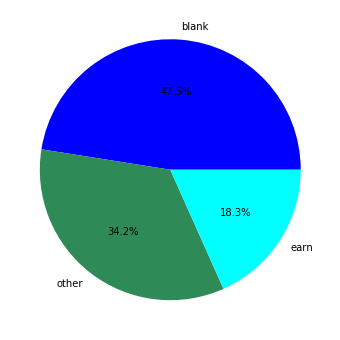

In [124]:
from matplotlib.pyplot import figure

figure(figsize=(6, 6))
# sns.set_theme()
sns.color_palette("husl", 3)
data = df['topic'].value_counts()
labels = data.keys()
plt.pie(x = data, labels = labels, autopct="%.1f%%", colors = ['blue','seagreen','aqua'])
plt.show()

Close to half are blank. The question will be what to do about these. 

## Process the text

In [125]:
df.text[0]

'BAHIA COCOA REVIEW SALVADOR, Feb 26 - Showers continued throughout the week in the Bahia cocoa zone, alleviating the drought since early January and improving prospects for the coming temporao, although normal humidity levels have not been restored, Comissaria Smith said in its weekly review. The dry period means the temporao will be late this year. Arrivals for the week ended February 22 were 155,221 bags of 60 kilos making a cumulative total for the season of 5.93 mln against 5.81 at the same stage last year. Again it seems that cocoa delivered earlier on consignment was included in the arrivals figures. Comissaria Smith said there is still some doubt as to how much old crop cocoa is still available as harvesting has practically come to an end. With total Bahia crop estimates around 6.4 mln bags and sales standing at almost 6.2 mln there are a few hundred thousand bags still in the hands of farmers, middlemen, exporters and processors. There are doubts as to how much of this cocoa w

In [126]:
df.text[100]

'FEDERAL RESERVE MONEY SUPPLY REPORT - FEB 26 One Week Ended Feb 16 M-1.........................736.7 up.......2.1 Previous week revised to....734.6 From...734.2 Avge 4 Weeks (Vs Week Ago).735.0 Vs.....733.5 Avge 13 Weeks (Vs week Ago).731.8 Vs.....729.8 Monthly aggregates (Adjusted avgs in billions) M-1 (Jan vs Dec)............737.6 Vs.....730.5 M-2 (Jan vs Dec)..........2,820.1 Vs...2,798.4 M-3 (Jan vs Dec)..........3,513.6 Vs...3,488.1 L...(Dec vs Nov)..........4,141.5 Vs...4,110.5 Domestic Debt(Dec vs Nov).7,604.4 Vs...7,519.8 Reuter'

In [127]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [128]:
stopwords_list = stopwords.words('english') + list(string.punctuation)

In [129]:
# function to remove stopwords and tokenize text
def process_narrative(narrative):
    tokens = nltk.word_tokenize(narrative)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stopwords_list]
    return stopwords_removed

In [130]:
text1 = df.text[0]
text_words = process_narrative(text1)
text_words[0:20]

['bahia',
 'cocoa',
 'review',
 'salvador',
 'feb',
 '26',
 'showers',
 'continued',
 'throughout',
 'week',
 'bahia',
 'cocoa',
 'zone',
 'alleviating',
 'drought',
 'since',
 'early',
 'january',
 'improving',
 'prospects']

In [131]:
text2 = df.text[100]
text_words = process_narrative(text2)
text_words[0:20]

['federal',
 'reserve',
 'money',
 'supply',
 'report',
 'feb',
 '26',
 'one',
 'week',
 'ended',
 'feb',
 '16',
 'm-1',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...',
 '...']

I'll add '...' to stopwords.

In [132]:
stopwords_list.append('...')
stopwords_list[-5:]

['{', '|', '}', '~', '...']

In [133]:
text2 = df.text[100]
text_words = process_narrative(text2)
text_words[0:20]

['federal',
 'reserve',
 'money',
 'supply',
 'report',
 'feb',
 '26',
 'one',
 'week',
 'ended',
 'feb',
 '16',
 'm-1',
 '.736.7',
 '.2.1',
 'previous',
 'week',
 'revised',
 '.734.6',
 '734.2']

In [134]:
df.text[200]

'MAIL BOXES ETC <MAIL> 3RD QTR JAN 31 NET SAN DIEGO, Calif., Feb 26 - Shr 23 cts vs 18 cts Net 509,144 vs 277,834 Revs 2,258,341 vs 1,328,634 Avg shrs 2,177,553 vs 1,564,605 Nine mths Shr 55 cts vs 42 cts Net 1,150,633 vs 649,914 Revs 6,169,168 vs 3,178,115 Reuter'

In [135]:
df.text[20001]

'TRANSAMERICA CORP <TA> QUARTERLY DIVIDEND SAN FRANCISCO, June 18 - Qtly div 44 cts vs 44 cts Pay July 31 Record July 3 Reuter'

In [136]:
# Check out word counts

text_words = process_narrative(text1)

word_counts = {}
for i in range(len(text_words)):
    word_counts[text_words[i]] = text_words.count(text_words[i])
word_counts

{'bahia': 4,
 'cocoa': 7,
 'review': 2,
 'salvador': 1,
 'feb': 1,
 '26': 1,
 'showers': 1,
 'continued': 1,
 'throughout': 1,
 'week': 2,
 'zone': 1,
 'alleviating': 1,
 'drought': 1,
 'since': 1,
 'early': 1,
 'january': 1,
 'improving': 1,
 'prospects': 1,
 'coming': 1,
 'temporao': 2,
 'although': 1,
 'normal': 1,
 'humidity': 1,
 'levels': 1,
 'restored': 1,
 'comissaria': 5,
 'smith': 5,
 'said': 5,
 'weekly': 1,
 'dry': 1,
 'period': 2,
 'means': 1,
 'late': 1,
 'year': 2,
 'arrivals': 2,
 'ended': 1,
 'february': 3,
 '22': 1,
 '155,221': 1,
 'bags': 5,
 '60': 1,
 'kilos': 2,
 'making': 1,
 'cumulative': 1,
 'total': 3,
 'season': 1,
 '5.93': 1,
 'mln': 5,
 '5.81': 1,
 'stage': 1,
 'last': 1,
 'seems': 1,
 'delivered': 1,
 'earlier': 1,
 'consignment': 2,
 'included': 1,
 'figures': 2,
 'still': 3,
 'doubt': 1,
 'much': 2,
 'old': 1,
 'crop': 5,
 'available': 1,
 'harvesting': 1,
 'practically': 1,
 'come': 1,
 'end': 1,
 'estimates': 1,
 'around': 1,
 '6.4': 1,
 'sales': 7,
 's

In [137]:
FreqDist(text_words)

FreqDist({'dlrs': 14, 'new': 9, 'york': 8, 'cocoa': 7, 'sales': 7, 'times': 7, 'comissaria': 5, 'smith': 5, 'said': 5, 'bags': 5, ...})

In [138]:
FreqDist(text_words).most_common(10)

[('dlrs', 14),
 ('new', 9),
 ('york', 8),
 ('cocoa', 7),
 ('sales', 7),
 ('times', 7),
 ('comissaria', 5),
 ('smith', 5),
 ('said', 5),
 ('bags', 5)]

It seems there are a lot of numbers. Update function to get rid of numbers from the list.

Note: this function also gets rid of strings with punctuation in it like "n't".

In [139]:
def process_narrative(narrative):
    tokens = nltk.word_tokenize(narrative)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stopwords_list]
    
    # adding line to remove all tokens with numbers and punctuation
    stopwords_punc_and_numbers_removed = [word for word in stopwords_removed if word.isalpha()]
    
    return stopwords_punc_and_numbers_removed

In [140]:
text1 = df.text[0]
text_words = process_narrative(text1)
text_words[0:20]

['bahia',
 'cocoa',
 'review',
 'salvador',
 'feb',
 'showers',
 'continued',
 'throughout',
 'week',
 'bahia',
 'cocoa',
 'zone',
 'alleviating',
 'drought',
 'since',
 'early',
 'january',
 'improving',
 'prospects',
 'coming']

## Concatenate all the narratives into a single string per topic

In [141]:
blank_df = df[df['topic'] == 'blank']
other_df = df[df['topic'] == 'other']
earn_df = df[df['topic'] == 'earn']

In [142]:
def concat_narratives(df):
    # concat narratives
    narr = ''
    for i in range(len(df)):
        narr += df.iloc[i]['text']
    print('Finished Concatenation')
    return narr

In [143]:
blank_text = concat_narratives(blank_df)
blank_text_processed = process_narrative(blank_text)

other_text = concat_narratives(other_df)
other_text_processed = process_narrative(other_text)

earn_text = concat_narratives(earn_df)
earn_text_processed = process_narrative(earn_text)

Finished Concatenation
Finished Concatenation
Finished Concatenation


In [144]:
FreqDist(blank_text_processed).most_common(30)

[('said', 26590),
 ('dlrs', 8914),
 ('pct', 8127),
 ('mln', 8030),
 ('march', 6362),
 ('new', 5815),
 ('company', 4958),
 ('billion', 4720),
 ('would', 4259),
 ('bank', 4179),
 ('year', 4151),
 ('april', 4010),
 ('inc', 3876),
 ('corp', 3721),
 ('debt', 3274),
 ('stock', 3094),
 ('market', 2961),
 ('one', 2639),
 ('shares', 2588),
 ('last', 2568),
 ('also', 2523),
 ('co', 2483),
 ('banks', 2279),
 ('two', 2161),
 ('york', 2151),
 ('may', 2144),
 ('government', 2118),
 ('june', 2072),
 ('dlr', 2071),
 ('first', 1991)]

In [145]:
FreqDist(other_text_processed).most_common(30)

[('said', 24465),
 ('pct', 9340),
 ('mln', 7717),
 ('dlrs', 6906),
 ('march', 5390),
 ('would', 4843),
 ('billion', 4307),
 ('year', 4287),
 ('trade', 3512),
 ('new', 3384),
 ('oil', 3368),
 ('bank', 3289),
 ('company', 3184),
 ('last', 3157),
 ('april', 3030),
 ('market', 2898),
 ('tonnes', 2795),
 ('prices', 2413),
 ('inc', 2403),
 ('also', 2321),
 ('shares', 2200),
 ('corp', 2135),
 ('one', 2111),
 ('two', 1981),
 ('price', 1950),
 ('government', 1947),
 ('japan', 1929),
 ('rate', 1878),
 ('stock', 1855),
 ('february', 1777)]

In [146]:
FreqDist(earn_text_processed).most_common(30)

[('vs', 13885),
 ('mln', 11458),
 ('cts', 7828),
 ('net', 6496),
 ('dlrs', 6077),
 ('loss', 5022),
 ('shr', 3969),
 ('said', 3641),
 ('march', 3276),
 ('year', 3150),
 ('profit', 2822),
 ('qtr', 2490),
 ('revs', 2328),
 ('billion', 1947),
 ('share', 1768),
 ('april', 1722),
 ('company', 1702),
 ('inc', 1665),
 ('note', 1413),
 ('pct', 1278),
 ('corp', 1255),
 ('sales', 1250),
 ('oper', 1219),
 ('quarter', 1163),
 ('dividend', 1044),
 ('avg', 1027),
 ('shrs', 1023),
 ('record', 963),
 ('earnings', 884),
 ('nine', 881)]

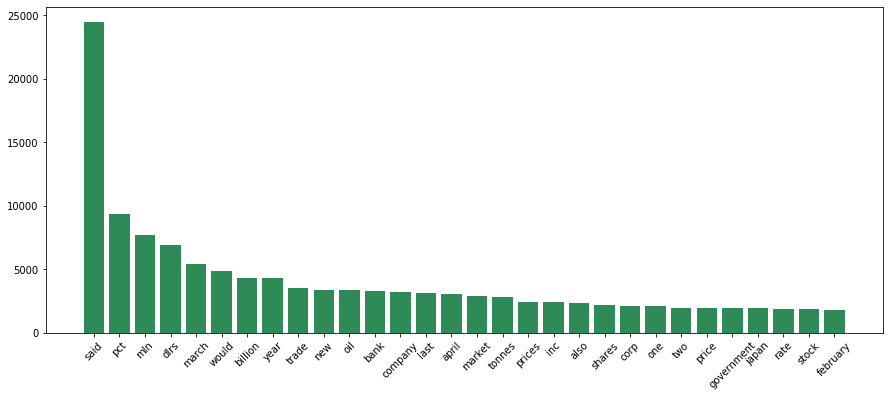

In [147]:
figure(figsize=(15, 6))
other_words = FreqDist(other_text_processed).most_common(30)
words = [i[0] for i in other_words]
counts = [i[1] for i in other_words]
plt.xticks(fontsize=10, rotation = 45)
plt.bar(words, counts, color = 'seagreen')
plt.show()

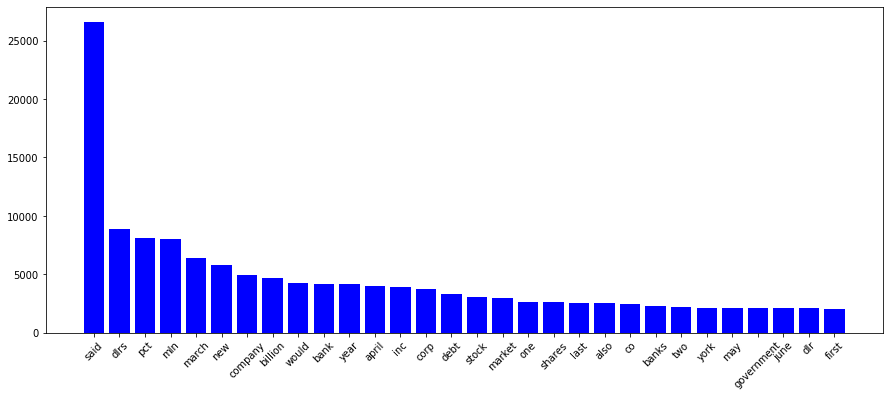

In [148]:
figure(figsize=(15, 6))
blank_words = FreqDist(blank_text_processed).most_common(30)
words = [i[0] for i in blank_words]
counts = [i[1] for i in blank_words]
plt.xticks(fontsize=10, rotation = 45)
plt.bar(words, counts, color = 'blue')
plt.show()

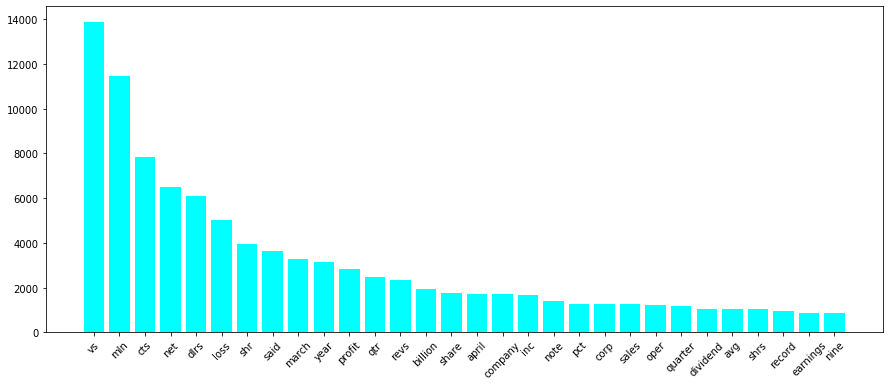

In [149]:
figure(figsize=(15, 6))
earn_words = FreqDist(earn_text_processed).most_common(30)
words = [i[0] for i in earn_words]
counts = [i[1] for i in earn_words]
plt.xticks(fontsize=10, rotation = 45)
plt.bar(words, counts, color = 'aqua')
plt.show()

## Check with TF-IDF

This step will help weight the words to equalize docs of different lengths.
  

In [150]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [151]:
# function to concat processed text as a single string inside a list
def concat_words(list):
    # remove any NaN's
    list = [i for i in list if i is not np.nan]

    # concat words
    concat_words = ''
    for word in list:
        concat_words += word + ' '
    return [concat_words]

In [152]:
vectorizer = TfidfVectorizer()
blank_corpus = concat_words(blank_text_processed)
X_blank = vectorizer.fit_transform(blank_corpus)

In [153]:
X_blank.shape

(1, 32046)

In [154]:
# transposing it 
X_blank = X_blank.T.todense()
X_blank.shape

(32046, 1)

In [155]:
# feature_names = vectorizer.get_feature_names_out()
feature_names = vectorizer.get_feature_names()

In [156]:
df_blank = pd.DataFrame(X_blank, index=feature_names, columns=["score_blank"])
df_blank = df_blank.sort_values(by="score_blank", ascending=False)
df_blank.iloc[0:15]

,score_blank
said,0.690423
dlrs,0.231456
pct,0.211022
mln,0.208503
march,0.165193
new,0.150989
company,0.128737
billion,0.122557
would,0.110587
bank,0.108510


Let's do it with the other two

In [157]:
earn_corpus = concat_words(earn_text_processed)
X_earn = vectorizer.fit_transform(earn_corpus)
X_earn = X_earn.T.todense()
# feature_names = vectorizer.get_feature_names_out()
feature_names = vectorizer.get_feature_names()
df_earn = pd.DataFrame(X_earn, index=feature_names, columns=["score_earn"])
df_earn = df_earn.sort_values(by="score_earn", ascending=False)
df_earn.iloc[0:15]

,score_earn
vs,0.562084
mln,0.463835
cts,0.316888
net,0.262967
dlrs,0.246005
loss,0.203297
shr,0.160670
said,0.147393
march,0.132617
year,0.127516


In [158]:
other_corpus = concat_words(other_text_processed)
X_other = vectorizer.fit_transform(other_corpus)
X_other = X_other.T.todense()
# feature_names = vectorizer.get_feature_names_out()
feature_names = vectorizer.get_feature_names()
df_other = pd.DataFrame(X_other, index=feature_names, columns=["score_other"])
df_other = df_other.sort_values(by="score_other", ascending=False)
df_other.iloc[0:15]

,score_other
said,0.687616
pct,0.262511
mln,0.216895
dlrs,0.194101
march,0.151492
would,0.136118
billion,0.121053
year,0.120491
trade,0.098709
new,0.095111


## Making a combined TF-IDF dataframe

In [159]:
corpus = other_corpus + blank_corpus + earn_corpus
print(type(corpus))
print(len(corpus))

<class 'list'>
3


In [160]:
X_corpus = vectorizer.fit_transform(corpus)
X_corpus = X_corpus.T.todense()
# feature_names = vectorizer.get_feature_names_out()
feature_names = vectorizer.get_feature_names()
df_corpus = pd.DataFrame(X_corpus, index=feature_names, columns=["other", "blank", "earn"])
df_corpus = df_corpus.sort_values(by="other", ascending=False)
df_corpus.iloc[0:15]

,other,blank,earn
said,0.686221,0.689482,0.146762
pct,0.261978,0.210734,0.051514
mln,0.216455,0.208219,0.461852
dlrs,0.193707,0.231141,0.244953
march,0.151185,0.164967,0.132050
would,0.135842,0.110436,0.016889
billion,0.120807,0.122390,0.078480
year,0.120246,0.107636,0.126971
trade,0.098508,0.032413,0.000927
new,0.094918,0.150784,0.032126


In [161]:
df_corpus.sort_values(by="earn", ascending=False).iloc[0:15]

,other,blank,earn
vs,0.008443,0.017088,0.559680
mln,0.216455,0.208219,0.461852
cts,0.011416,0.026578,0.315533
net,0.011528,0.019344,0.261842
dlrs,0.193707,0.231141,0.244953
loss,0.005750,0.013406,0.202428
shr,0.000056,0.005005,0.159983
said,0.686221,0.689482,0.146762
march,0.151185,0.164967,0.132050
year,0.120246,0.107636,0.126971


## Create TF-IDF with bi-grams

In [162]:
vectorizer = TfidfVectorizer(ngram_range=(1,2))

X_corpus = vectorizer.fit_transform(corpus)
X_corpus = X_corpus.T.todense()
# feature_names = vectorizer.get_feature_names_out()
feature_names = vectorizer.get_feature_names()
df_corpus = pd.DataFrame(X_corpus, index=feature_names, columns=["other", "blank", "earn"])
df_corpus = df_corpus.sort_values(by="other", ascending=False)
df_corpus.iloc[0:15]

,other,blank,earn
said,0.676093,0.676254,0.136195
pct,0.258112,0.206691,0.047805
mln,0.213260,0.204224,0.428596
dlrs,0.190848,0.226707,0.227315
march,0.148953,0.161803,0.122542
would,0.133837,0.108318,0.015673
billion,0.119024,0.120042,0.072829
year,0.118472,0.105571,0.117829
trade,0.097055,0.031791,0.000860
new,0.093517,0.147891,0.029812


In [163]:
top_words_tfidf_earn = df_corpus.index[0:20].values.tolist()
top_words_tfidf_earn

['said',
 'pct',
 'mln',
 'dlrs',
 'march',
 'would',
 'billion',
 'year',
 'trade',
 'new',
 'oil',
 'bank',
 'company',
 'last',
 'april',
 'market',
 'tonnes',
 'mln dlrs',
 'prices',
 'inc']

In [164]:
df_corpus.sort_values(by="earn", ascending=False).iloc[0:15]

,other,blank,earn
vs,0.008318,0.016760,0.519381
mln,0.213260,0.204224,0.428596
cts,0.011247,0.026068,0.292813
net,0.011358,0.018973,0.242989
dlrs,0.190848,0.226707,0.227315
loss,0.005665,0.013149,0.187852
shr,0.000055,0.004909,0.148464
mln vs,0.000138,0.002620,0.143863
vs mln,0.001962,0.003026,0.142404
said,0.676093,0.676254,0.136195


Bi-grams may matter as they do occupy some top positions when sorting by "earn"

Let's try it with tri-grams, sorted by "earn"

In [165]:
vectorizer = TfidfVectorizer(ngram_range=(1,3))

X_corpus = vectorizer.fit_transform(corpus)
X_corpus = X_corpus.T.todense()
# feature_names = vectorizer.get_feature_names_out()
feature_names = vectorizer.get_feature_names()
df_corpus = pd.DataFrame(X_corpus, index=feature_names, columns=["other", "blank", "earn"])
df_corpus = df_corpus.sort_values(by="earn", ascending=False)
df_corpus.iloc[0:15]

,other,blank,earn
vs,0.008301,0.016718,0.504290
mln,0.212815,0.203708,0.416143
cts,0.011224,0.026003,0.284305
net,0.011334,0.018925,0.235928
dlrs,0.190450,0.226134,0.220711
loss,0.005653,0.013115,0.182394
shr,0.000055,0.004896,0.144150
mln vs,0.000138,0.002613,0.139683
vs mln,0.001958,0.003019,0.138267
said,0.674682,0.674547,0.132238


There is one tri-gram in the 12 position

## Count Vectorizer

Try it with bi-grams

In [166]:
vectorizer = CountVectorizer(ngram_range=(1,2))

X_corpus = vectorizer.fit_transform(corpus)
X_corpus = X_corpus.T.todense()
# feature_names = vectorizer.get_feature_names_out()
feature_names = vectorizer.get_feature_names()
df_corpus = pd.DataFrame(X_corpus, index=feature_names, columns=["other", "blank", "earn"])
df_corpus = df_corpus.sort_values(by="earn", ascending=False)
df_corpus.iloc[0:15]

,other,blank,earn
vs,301,659,13885
mln,7717,8030,11458
cts,407,1025,7828
net,411,746,6496
dlrs,6906,8914,6077
loss,205,517,5022
shr,2,193,3969
mln vs,5,103,3846
vs mln,71,119,3807
said,24465,26590,3641


In [167]:
top_words_cv_earn = df_corpus.index[0:20].values.tolist()
top_words_cv_earn

['vs',
 'mln',
 'cts',
 'net',
 'dlrs',
 'loss',
 'shr',
 'mln vs',
 'vs mln',
 'said',
 'march',
 'cts vs',
 'year',
 'profit',
 'qtr',
 'revs',
 'cts net',
 'mln dlrs',
 'billion',
 'vs cts']

In [168]:
top_words_tfidf_earn

['said',
 'pct',
 'mln',
 'dlrs',
 'march',
 'would',
 'billion',
 'year',
 'trade',
 'new',
 'oil',
 'bank',
 'company',
 'last',
 'april',
 'market',
 'tonnes',
 'mln dlrs',
 'prices',
 'inc']

In [169]:
top_words_earn = {'tfidf': top_words_tfidf_earn, 'cv': top_words_cv_earn}
pd.DataFrame(top_words_earn, columns=['tfidf', 'cv'])

,tfidf,cv
0,said,vs
1,pct,mln
2,mln,cts
3,dlrs,net
4,march,dlrs
5,would,loss
6,billion,shr
7,year,mln vs
8,trade,vs mln
9,new,said


They are somewhat different. I should try both when modeling.

## Lemmatize the words

In [170]:
import nltk
nltk.download('wordnet')
lemm = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\halpe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [171]:
def make_lemma(list_of_words):
    # remove any NaN's
    list_of_words = [i for i in list_of_words if i is not np.nan]
    
    list_to_return = []
    for idx, word in enumerate(list_of_words):
        list_to_return.append(lemm.lemmatize(word))
    return list_to_return

In [172]:
other_lemmatized = concat_words(make_lemma(other_text_processed))
blank_lemmatized = concat_words(make_lemma(blank_text_processed))
earn_lemmatized = concat_words(make_lemma(earn_text_processed))

In [173]:
corpus_lemmatized = other_lemmatized + blank_lemmatized + earn_lemmatized

Rerun the first TF-IDF bi-gram and check it against a lemmatized version

In [174]:
vectorizer = TfidfVectorizer(ngram_range=(1,2))

X_corpus = vectorizer.fit_transform(corpus)
X_corpus = X_corpus.T.todense()
# feature_names = vectorizer.get_feature_names_out()
feature_names = vectorizer.get_feature_names()
df_corpus = pd.DataFrame(X_corpus, index=feature_names, columns=["other", "blank", "earn"])
df_corpus = df_corpus.sort_values(by="other", ascending=False)
df_corpus.iloc[0:15]

,other,blank,earn
said,0.676093,0.676254,0.136195
pct,0.258112,0.206691,0.047805
mln,0.213260,0.204224,0.428596
dlrs,0.190848,0.226707,0.227315
march,0.148953,0.161803,0.122542
would,0.133837,0.108318,0.015673
billion,0.119024,0.120042,0.072829
year,0.118472,0.105571,0.117829
trade,0.097055,0.031791,0.000860
new,0.093517,0.147891,0.029812


In [175]:
vectorizer = TfidfVectorizer(ngram_range=(1,2))

X_corpus = vectorizer.fit_transform(corpus_lemmatized)
X_corpus = X_corpus.T.todense()
# feature_names = vectorizer.get_feature_names_out()
feature_names = vectorizer.get_feature_names()
df_corpus_lemmatized = pd.DataFrame(X_corpus, index=feature_names, columns=["other", "blank", "earn"])
df_corpus_lemmatized = df_corpus_lemmatized.sort_values(by="other", ascending=False)
df_corpus_lemmatized.iloc[0:15]

,other,blank,earn
said,0.650819,0.650751,0.163769
pct,0.248463,0.198945,0.057483
mln,0.205288,0.196522,0.515369
dlrs,0.183714,0.218157,0.273337
march,0.143412,0.155701,0.147351
year,0.136335,0.135436,0.147756
would,0.128834,0.104233,0.018846
price,0.116065,0.054062,0.011470
billion,0.114894,0.116029,0.087574
bank,0.113910,0.158050,0.029776


Some things look a little different. For example, 'april' appears on first list, 'oil' on second.

In [176]:
len(df_corpus_lemmatized)

729109

In [177]:
len(df_corpus)

773761

In [178]:
len(df_corpus) - len(df_corpus_lemmatized)

44652

In [179]:
(len(df_corpus) - len(df_corpus_lemmatized))/len(df_corpus) * 100

5.770774179623941

Lemmatizing the corpus consolidated some words and reduced the length by 5.77%

# Prep data for modeling

In [180]:
# importing and reloading for when I don't want to rerun code above

import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize, FreqDist
from nltk.stem.wordnet import WordNetLemmatizer
import string
import re

In [181]:
# from google.colab import drive
# drive.mount('/gdrive')
# %cd /gdrive
# path = '/gdrive/My Drive/Colab Notebooks/interos/data_files/'
# df = pd.read_csv(path + 'topics_and_text.csv')

In [182]:
df.head()

,topic,text
0,other,"BAHIA COCOA REVIEW SALVADOR, Feb 26 - Showers ..."
1,blank,STANDARD OIL <SRD> TO FORM FINANCIAL UNIT CLEV...
2,blank,TEXAS COMMERCE BANCSHARES <TCB> FILES PLAN HOU...
3,blank,TALKING POINT/BANKAMERICA <BAC> EQUITY OFFER b...
4,other,NATIONAL AVERAGE PRICES FOR FARMER-OWNED RESER...


In [183]:
df.loc[8].text

'CHAMPION PRODUCTS <CH> APPROVES STOCK SPLIT ROCHESTER, N.Y., Feb 26 - Champion Products Inc said its board of directors approved a two-for-one stock split of its common shares for shareholders of record as of April 1, 1987. The company also said its board voted to recommend to shareholders at the annual meeting April 23 an increase in the authorized capital stock from five mln to 25 mln shares. Reuter'

In [184]:
df.loc[1003].topic

'blank'

In [185]:
len(df)

21999

## Loop through texts to remove stopwords, tokenize and lemmatize

In [186]:
stopwords_list = stopwords.words('english') + list(string.punctuation) + ['...']

I think the stock symbols might be important for modeling, so this function will take them out, and I'll stick them at the end of text after tokenizing. If I tokenize the tickers, it will remove '<>'.

In [187]:
def reserve_tickers(string):
    tickers = re.findall("\<\w+>", string)
    string = re.sub("\<\w+>", "", string)
    
    return tickers, string

In [188]:
def process_text(text):
    
    tickers, text = reserve_tickers(text)
    
    tokens = nltk.word_tokenize(text)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stopwords_list]
    
    # adding line to remove all tokens with numbers and punctuation
    stopwords_punc_and_numbers_removed = [word for word in stopwords_removed if word.isalpha()]
    
    return stopwords_punc_and_numbers_removed + tickers

# function to concatenate a list of words into a single, space-separated string (used in function below)
def concat_words(list_of_words):

    concat_words = ''
    for word in list_of_words:
        concat_words += word + ' '
    return concat_words.strip()

# function to lemmatize words and merge each text into a single, space-separated string

lemm = WordNetLemmatizer()

def make_lemma_and_concat(list_of_words):
    # remove any NaN's
    list_of_words = [i for i in list_of_words if i is not np.nan]
    
    # lemmatize each word
    lemmatized_list = []
    for idx, word in enumerate(list_of_words):
        lemmatized_list.append(lemm.lemmatize(word))
    
    # make the list into a single string 
    concatenated_string = concat_words(lemmatized_list)
    return concatenated_string

## Prepare dataframe for modeling

In [189]:
df.iloc[14790:14793]

,topic,text
14790,other,SOUTH AFRICAN GOLD HOLDINGS RISE IN MARCH PRET...
14791,blank,IOM OPTIONS OPEN INTEREST FOR April 6 OPEN CHA...
14793,blank,HOTEL INVESTORS <HOT> HOLDERS APPROVE STOCK SA...


In [190]:
for i in range(len(df)):
    # there's was something about 14792 that was throwing an error and breaking the loop 
    if i != 14792:
        processed_text = process_text(df['text'].loc[i])
        txt = make_lemma_and_concat(processed_text)
        df['text'].loc[i] = txt
        if i % 3000 == 0:
            print(f'Finished line number {i}')
df.head()

Finished line number 0
Finished line number 3000
Finished line number 6000
Finished line number 9000
Finished line number 12000
Finished line number 15000
Finished line number 18000
Finished line number 21000


,topic,text
0,other,bahia cocoa review salvador feb shower continu...
1,blank,standard oil form financial unit cleveland feb...
2,blank,texas commerce bancshares file plan houston fe...
3,blank,talking equity offer janie gabbett reuters los...
4,other,national average price reserve washington feb ...


In [191]:
df.iloc[1].text

'standard oil form financial unit cleveland feb standard oil co bp north america inc said plan form venture manage money market borrowing investment activity company bp north america subsidiary british petroleum co plc also owns pct interest standard oil venture called financial trading operated standard oil oversight joint management committee reuter <SRD> <BP>'

In [192]:
len(df)

21999

Save this dataframe


In [193]:
df.to_csv('data_files/' + 'text_processed.csv', index=False)

# Baseline modeling

In [194]:
import numpy as np
import pandas as pd


from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

import time
import matplotlib.pyplot as plt

Add functions for scoring models

In [195]:
def scoring(y_real, y_pred, X_data): # change y_test to y_real
    # Calculates and prints scores for the model
    accuracy = accuracy_score(y_real, y_pred)
    precision = precision_score(y_real, y_pred, average='macro')
    recall = recall_score(y_real, y_pred, average='macro')
    f1 = f1_score(y_real, y_pred, average='macro')

    print("Accuracy: {:.1%}".format(accuracy))
    print("Precision: {:.1%}".format(precision))
    print("Recall: {:.1%}".format(recall))
    print("F1: {:.1%}".format(f1))

    print('\n')
    print("Classification Report")
    print('\n')
    print(classification_report(y_real, y_pred))
    cm = confusion_matrix(y_real, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()


In [197]:
df = pd.read_csv('data_files/' + 'text_processed.csv')

In [198]:
df.shape

(21999, 2)

## Change topic names to integers

In [199]:
df.topic.unique()

array(['other', 'blank', 'earn'], dtype=object)

In [200]:
topic_dict = {'earn': 1, 'other': 2, 'blank': 3}
df.topic.replace(topic_dict, inplace=True)
df.topic.unique()

array([2, 3, 1], dtype=int64)

In [201]:
print(f"Topic 1: {round((sum(df.topic == 1)/len(df.topic)) *100, 2)}%")
print(f"Topic 2: {round((sum(df.topic == 2)/len(df.topic)) *100, 2)}%")
print(f"Topic 3: {round((sum(df.topic == 3)/len(df.topic)) *100, 2)}%")

Topic 1: 18.31%
Topic 2: 34.19%
Topic 3: 47.5%


## Train-Test Split

In [202]:
X = df.drop(['topic'], axis=1)
y = df['topic']

X_train, X_test, y_train, y_test = train_test_split(X['text'], y, test_size=0.20, random_state=200)

In [203]:
X_train

6545     kenan transport co set quarterly chapel hill m...
13851    canrad acquires measurement system newark apri...
18917    japan highway corp plan issue ecu bond tokyo j...
21937    house say reagan concerned stock drop convince...
19340    ball corp completes acquisition muncie june ba...
                               ...                        
9036     guest supply get shareholder suit north brunsw...
14007    fhlbb say mortgage rate continue decline washi...
784      anchor glass cleared listed nyse tampa march a...
12905    national intergroup unit file offer pittsburgh...
1818     siemens ag unit begin making system boca raton...
Name: text, Length: 17599, dtype: object

In [204]:
y_train

6545     1
13851    2
18917    3
21937    3
19340    2
        ..
9036     3
14007    2
784      3
12905    3
1818     3
Name: topic, Length: 17599, dtype: int64

In [205]:
print(X_test.shape)
X_train.shape

(4400,)


(17599,)

## TF-IDF

### Instatiate training set

In [206]:
vectorizer = TfidfVectorizer(ngram_range=(1,2))
# vect_X_train = vectorizer.fit_transform(X_train)
vect_X_train = vectorizer.fit_transform(X_train.values.astype(str))
# feature_names =  vectorizer.get_feature_names_out()
feature_names =  vectorizer.get_feature_names()

In [207]:
len(feature_names)

602834

In [208]:
vect_X_train.shape

(17599, 602834)

Use `fit_transform()` on training data and `transform()` on test data. The model has already been fit on the training data, so you don't want to fit it again.

In [209]:
vect_X_test = vectorizer.transform(X_test)

## Create models

### Naive Bayes


Instantiate new model instance. Fit the model to all the training data.


In [210]:
cls = MultinomialNB()
cls.fit(vect_X_train, y_train)

MultinomialNB()

Now that the model has been trained on the vectorized training data, see how it will predict classes from that test data.

In [211]:
y_pred = cls.predict(vect_X_train)

In [212]:
np.unique(y_pred)

array([1, 2, 3], dtype=int64)

Compare how accurate the real test data is to what the model predicted

In [213]:
f'The accuracy score is: {round(accuracy_score(y_train, y_pred)*100, 2)}%'

'The accuracy score is: 89.24%'

Accuracy: 89.2%
Precision: 91.7%
Recall: 86.7%
F1: 88.6%


Classification Report


              precision    recall  f1-score   support

           1       0.95      0.79      0.86      3253
           2       0.97      0.85      0.90      5990
           3       0.84      0.97      0.90      8356

    accuracy                           0.89     17599
   macro avg       0.92      0.87      0.89     17599
weighted avg       0.90      0.89      0.89     17599



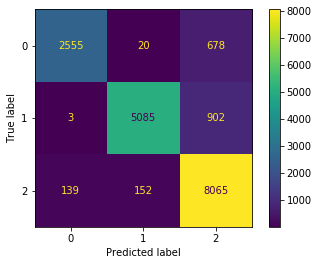

In [214]:
scoring(y_train, y_pred, vect_X_train)

Pretty good!

Try it when merging 'blank' and 'other' into one topic 

In [216]:
df2 = pd.read_csv('data_files/text_processed.csv')
topic_dict = {'earn': 1, 'other': 2, 'blank': 2}
df2.topic.replace(topic_dict, inplace=True)

In [217]:
df2.head(10)

,topic,text
0,2,bahia cocoa review salvador feb shower continu...
1,2,standard oil form financial unit cleveland feb...
2,2,texas commerce bancshares file plan houston fe...
3,2,talking equity offer janie gabbett reuters los...
4,2,national average price reserve washington feb ...
5,2,argentine registration buenos aire feb argenti...
6,2,red lion inn file plan offering portland feb r...
7,2,usx debt dowgraded moody new york feb moody in...
8,1,champion product approves stock split rocheste...
9,2,computer terminal system completes sale commac...


In [218]:
print(f"Topic 1: {round((sum(df2.topic == 1)/len(df2.topic)) *100, 2)}%")
print(f"Topic 2: {round((sum(df2.topic == 2)/len(df2.topic)) *100, 2)}%")

Topic 1: 18.31%
Topic 2: 81.69%


In [219]:
X2 = df2.drop(['topic'], axis=1)
y2 = df2['topic']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2['text'], y2, test_size=0.20, random_state=200)

In [220]:
vect_X2_train = vectorizer.fit_transform(X2_train.values.astype(str))
vect_X2_test = vectorizer.transform(X2_test)

In [221]:
cls2 = MultinomialNB()
cls2.fit(vect_X2_train, y2_train)
y2_pred = cls2.predict(vect_X2_train)

Accuracy: 94.4%
Precision: 95.4%
Recall: 86.0%
F1: 89.8%


Classification Report


              precision    recall  f1-score   support

           1       0.97      0.73      0.83      3253
           2       0.94      0.99      0.97     14346

    accuracy                           0.94     17599
   macro avg       0.95      0.86      0.90     17599
weighted avg       0.95      0.94      0.94     17599



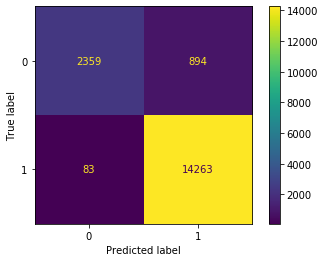

In [222]:
scoring(y2_train, y2_pred, vect_X2_train)


Making a df to easily compare how the two models did

In [223]:
compare = pd.DataFrame(columns=['3_topics', '2_topics'])

compare.loc['overall accuracy'] = [89.4, 94.6]
compare.loc['overall precision'] = [91.8, 95.5]
compare.loc['overall recall'] = [87.0, 86.4]
compare.loc['overall F1'] = [88.9, 90.1]
compare.loc['earn precision'] = [95, 97]
compare.loc['earn recall'] = [79, 73]
compare.loc['earn F1'] = [86, 83]
compare

,3_topics,2_topics
overall accuracy,89.4,94.6
overall precision,91.8,95.5
overall recall,87.0,86.4
overall F1,88.9,90.1
earn precision,95.0,97.0
earn recall,79.0,73.0
earn F1,86.0,83.0


The models did pretty similar with some trade offs here and there. Overall accuracy was 5 points better on the model with two topics.

The purpose of this task is to predict the articles that can be classified as 'earn'. 

'Earn' precision preformed 2 points better with two topics, but 'earn' recall performed 6 points worse with two topics. 'Earn' F1 was 3 points better.

#### Check for overfitting
Comparing with the one with 3 topics (un-merged)

In [224]:
test_y_pred = cls.predict(vect_X_test)

Accuracy: 81.9%
Precision: 86.8%
Recall: 79.3%
F1: 81.7%


Classification Report


              precision    recall  f1-score   support

           1       0.93      0.75      0.83       776
           2       0.93      0.68      0.79      1531
           3       0.75      0.94      0.83      2093

    accuracy                           0.82      4400
   macro avg       0.87      0.79      0.82      4400
weighted avg       0.84      0.82      0.82      4400



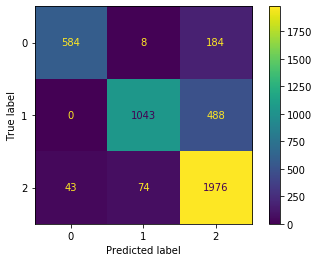

In [225]:
scoring(y_test, test_y_pred, vect_X_test)

Overall accuracy is down a little (7 points), but for the category 'earn', indivdual scores are down fewer points, maybe 2 or 3.

### Random Forest

In [226]:
rdmfst = RandomForestClassifier(max_depth=20)
rdmfst.fit(vect_X_train, y_train)

RandomForestClassifier(max_depth=20)

In [227]:
y_pred = rdmfst.predict(vect_X_train)

Accuracy: 69.7%
Precision: 86.2%
Recall: 65.2%
F1: 67.0%


Classification Report


              precision    recall  f1-score   support

           1       0.98      0.66      0.79      3253
           2       1.00      0.30      0.46      5990
           3       0.61      0.99      0.76      8356

    accuracy                           0.70     17599
   macro avg       0.86      0.65      0.67     17599
weighted avg       0.81      0.70      0.66     17599



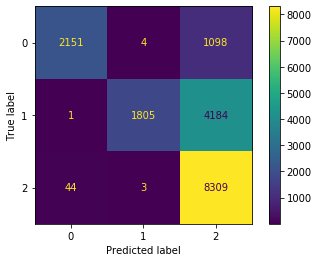

In [228]:
scoring(y_train, y_pred, vect_X_train)

Overall, a worse model. Won't bother checking for overfitting.

### Decision Tree

In [229]:
dtree = DecisionTreeClassifier(max_depth=20)
dtree.fit(vect_X_train, y_train)

DecisionTreeClassifier(max_depth=20)

In [230]:
y_pred = dtree.predict(vect_X_train)
f'The accuracy score is: {round(accuracy_score(y_train, y_pred)*100, 2)}%'

'The accuracy score is: 86.92%'

Accuracy: 86.9%
Precision: 90.5%
Recall: 86.6%
F1: 87.8%


Classification Report


              precision    recall  f1-score   support

           1       0.97      0.92      0.95      3253
           2       0.94      0.72      0.81      5990
           3       0.81      0.96      0.88      8356

    accuracy                           0.87     17599
   macro avg       0.90      0.87      0.88     17599
weighted avg       0.88      0.87      0.87     17599



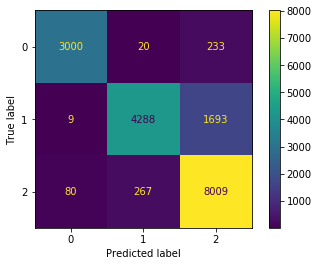

In [231]:
scoring(y_train, y_pred, vect_X_train)

Seems pretty good, as good or better than NB

#### Check for overfitting

Accuracy: 79.7%
Precision: 82.5%
Recall: 80.0%
F1: 80.6%


Classification Report


              precision    recall  f1-score   support

           1       0.89      0.88      0.89       776
           2       0.83      0.63      0.72      1531
           3       0.75      0.88      0.81      2093

    accuracy                           0.80      4400
   macro avg       0.82      0.80      0.81      4400
weighted avg       0.80      0.80      0.79      4400



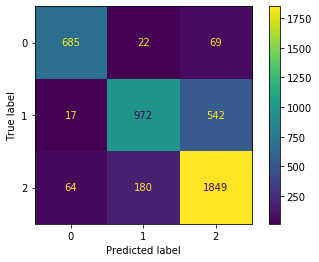

In [232]:
test_y_pred = dtree.predict(vect_X_test)

scoring(y_test, test_y_pred, vect_X_test)

At a quick glance, seems to have some problem with overfitting, espectially with 'earn' precision, but overall not too bad.

### KNN

In [233]:
neigh = KNeighborsClassifier(n_neighbors=5, weights='distance')
neigh.fit(vect_X_train, y_train)

KNeighborsClassifier(weights='distance')

In [234]:
y_pred = neigh.predict(vect_X_train)
f'The accuracy score is: {round(accuracy_score(y_train, y_pred)*100, 2)}%'

'The accuracy score is: 99.85%'

Accuracy: 99.8%
Precision: 99.8%
Recall: 99.9%
F1: 99.8%


Classification Report


              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3253
           2       1.00      1.00      1.00      5990
           3       1.00      1.00      1.00      8356

    accuracy                           1.00     17599
   macro avg       1.00      1.00      1.00     17599
weighted avg       1.00      1.00      1.00     17599



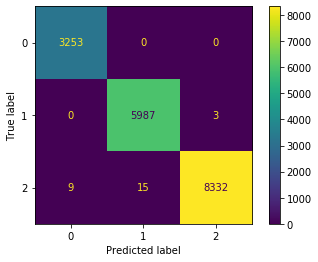

In [235]:
scoring(y_train, y_pred, vect_X_train)

Almost perfect!

#### Check for overfitting

Accuracy: 84.1%
Precision: 84.0%
Recall: 84.9%
F1: 84.3%


Classification Report


              precision    recall  f1-score   support

           1       0.83      0.90      0.86       776
           2       0.85      0.79      0.82      1531
           3       0.84      0.86      0.85      2093

    accuracy                           0.84      4400
   macro avg       0.84      0.85      0.84      4400
weighted avg       0.84      0.84      0.84      4400



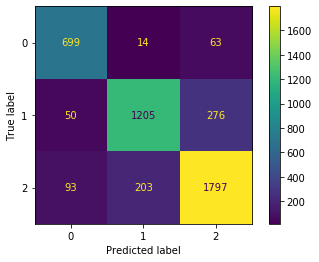

In [236]:
test_y_pred = neigh.predict(vect_X_test)

scoring(y_test, test_y_pred, vect_X_test)

Does seem to have an issue with overfitting, 17 point difference with accuracy

### XGBoost

In [237]:
xgb = XGBClassifier()

In [238]:
xgb.fit(vect_X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [239]:
y_pred = xgb.predict(vect_X_train)
f'The accuracy score is: {round(accuracy_score(y_train, y_pred)*100, 2)}%'

'The accuracy score is: 84.4%'

Accuracy: 84.4%
Precision: 87.3%
Recall: 84.3%
F1: 85.2%


Classification Report


              precision    recall  f1-score   support

           1       0.93      0.90      0.92      3253
           2       0.89      0.70      0.79      5990
           3       0.79      0.92      0.85      8356

    accuracy                           0.84     17599
   macro avg       0.87      0.84      0.85     17599
weighted avg       0.85      0.84      0.84     17599



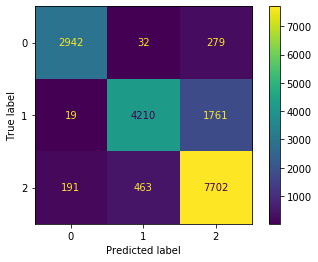

In [240]:
scoring(y_train, y_pred, vect_X_train)

An OK model, but not as strong as Decision Tree, KNN. Takes a long time to fit.

#### Check for overfitting

In [241]:
test_y_pred = xgb.predict(vect_X_test)

Accuracy: 82.5%
Precision: 85.3%
Recall: 83.1%
F1: 83.7%


Classification Report


              precision    recall  f1-score   support

           1       0.93      0.92      0.92       776
           2       0.86      0.68      0.76      1531
           3       0.78      0.90      0.83      2093

    accuracy                           0.82      4400
   macro avg       0.85      0.83      0.84      4400
weighted avg       0.83      0.82      0.82      4400



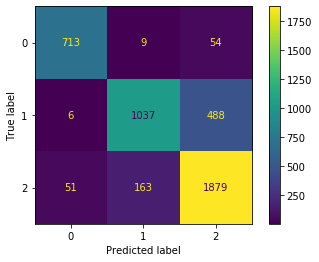

In [242]:
scoring(y_test, test_y_pred, vect_X_test)

Pretty good on not overfitting

## Compare models

After looking through the models' scores and overfitting issues, I decided that Decision Tree is a high performing model worth refining.

# Refining Model (Decision Tree)

Making new functions to score train and test models side by side for easy comparison.

In [243]:
def run_model(model, X_train, y_train, X_test, y_test, num_categories):
    model.fit(X_train, y_train)
    train_y_pred = model.predict(X_train)
    test_y_pred = model.predict(X_test)
    score_train_and_test(y_train, train_y_pred, y_test, test_y_pred)
    disp_conf_matrix(y_train, train_y_pred, y_test, test_y_pred, num_categories)

In [244]:
def disp_conf_matrix(y_train, train_y_pred, y_test, test_y_pred, num_categories):
    cm_train = confusion_matrix(y_train, train_y_pred, 
                               labels = [x + 1 for x in range(num_categories)])
    cm_test = confusion_matrix(y_test, test_y_pred, 
                               labels = [x + 1 for x in range(num_categories)])
    disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_train)
    disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_test)
    
    # plotting two side by side
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    axes[0].set_title('Training confusion matrix'.upper(), fontsize = 12)
    axes[1].set_title('Testing confusion matrix'.upper(), fontsize = 12)
    disp1.plot(ax=axes[0])
    disp2.plot(ax=axes[1])

def score_train_and_test(y_train, train_y_pred, y_test, test_y_pred):

    # Training Scores
    training_accuracy = accuracy_score(y_train, train_y_pred)
    training_precision = precision_score(y_train, train_y_pred, average='macro')
    training_recall = recall_score(y_train, train_y_pred, average='macro')
    training_f1 = f1_score(y_train, train_y_pred, average='macro')
    
    print("TRAINING - Classification Report")
    print("Accuracy: {:.1%}".format(training_accuracy))
    print("Precision: {:.1%}".format(training_precision))
    print("Recall: {:.1%}".format(training_recall))
    print("F1: {:.1%}".format(training_f1))
    print(classification_report(y_train, train_y_pred))
    
    # Testing Scores
    testing_accuracy = accuracy_score(y_test, test_y_pred)
    testing_precision = precision_score(y_test, test_y_pred, average='macro')
    testing_recall = recall_score(y_test, test_y_pred, average='macro')
    testing_f1 = f1_score(y_test, test_y_pred, average='macro')
    
    print("TESTING - Classification Report")
    print("Accuracy: {:.1%}".format(testing_accuracy))
    print("Precision: {:.1%}".format(testing_precision))
    print("Recall: {:.1%}".format(testing_recall))
    print("F1: {:.1%}".format(testing_f1))
    print(classification_report(y_test, test_y_pred))


It's unclear if 'blank' means no relevant topics or if these articles simply haven't been assigned and are really 'other'. 

Creating three dataframes to experiment with possibilities.

In [246]:
df = pd.read_csv('data_files/text_processed.csv')

df_merged = pd.read_csv('data_files/text_processed.csv')

df_no_blank = pd.read_csv('data_files/text_processed.csv') 
df_no_blank = df_no_blank[df_no_blank.topic != 'blank']

In [247]:
df.head()

,topic,text
0,other,bahia cocoa review salvador feb shower continu...
1,blank,standard oil form financial unit cleveland feb...
2,blank,texas commerce bancshares file plan houston fe...
3,blank,talking equity offer janie gabbett reuters los...
4,other,national average price reserve washington feb ...


In [248]:
topic_dict = {'earn': 1, 'other': 2, 'blank': 3}
topic_dict_merged = {'earn': 1, 'other': 2, 'blank': 2}
topic_dict_no_blank = {'earn': 1, 'other': 2}

# for all three topics
df.topic.replace(topic_dict, inplace=True)

# for merging 'blank' and 'other'
df_merged.topic.replace(topic_dict_merged, inplace=True)

# for the df without blank topics
df_no_blank.topic.replace(topic_dict_no_blank, inplace=True)

In [249]:
df_no_blank.head()

,topic,text
0,2,bahia cocoa review salvador feb shower continu...
4,2,national average price reserve washington feb ...
5,2,argentine registration buenos aire feb argenti...
8,1,champion product approves stock split rocheste...
9,2,computer terminal system completes sale commac...


## TF-IDF 

### Decision Tree - Main df

#### Train-test split

In [250]:
X = df.drop(['topic'], axis=1)
y = df['topic']

X_train, X_test, y_train, y_test = train_test_split(X['text'], y, test_size=0.20, random_state=200)

#### Pipeline 1
- get idea on what limiting TF-IDF does to performance
- get idea on what max depth does to performance

In [251]:
dt1_pipeline = Pipeline([('tfidf', TfidfVectorizer()), 
                         ('dt', DecisionTreeClassifier(random_state=123))])



In [252]:
dt1_param_grid = {
    'tfidf__ngram_range': [(1,1), (1,2)],
    'tfidf__max_features': [5000, 10000], 
    'dt__max_depth': [4, 6, 10]
}

In [253]:
dt1_grid_search = GridSearchCV(estimator=dt1_pipeline,
                               param_grid=dt1_param_grid,
                               scoring='recall_macro',
                               cv=3)

In [254]:
dt1_grid_search.fit(X_train.values.astype(str), y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('dt',
                                        DecisionTreeClassifier(random_state=123))]),
             param_grid={'dt__max_depth': [4, 6, 10],
                         'tfidf__max_features': [5000, 10000],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             scoring='recall_macro')

In [255]:
dt1_grid_search.best_params_

{'dt__max_depth': 10,
 'tfidf__max_features': 10000,
 'tfidf__ngram_range': (1, 1)}

#### Pipeline 2

In [256]:
dt2_pipeline = Pipeline([('tfidf', TfidfVectorizer()), 
                         ('dt', DecisionTreeClassifier(random_state=123))])


dt2_param_grid = {
    'tfidf__ngram_range': [(1,1)],
    'tfidf__max_features': [10000, 15000], 
    'dt__max_depth': [10, 15]
}

In [257]:
dt2_grid_search = GridSearchCV(estimator=dt2_pipeline,
                               param_grid=dt2_param_grid,
                               scoring='recall_macro',
                               cv=3)

In [258]:
dt2_grid_search.fit(X_train.values.astype(str), y_train)
dt2_grid_search.best_params_

{'dt__max_depth': 15,
 'tfidf__max_features': 15000,
 'tfidf__ngram_range': (1, 1)}

#### Pipeline 3

In [259]:
dt3_pipeline = Pipeline([('tfidf', TfidfVectorizer()), 
                         ('dt', DecisionTreeClassifier(random_state=123))])


dt3_param_grid = {
    'tfidf__ngram_range': [(1,1)],
    'tfidf__max_features': [15000], 
    'dt__max_depth': [15, None]
}

In [260]:
dt3_grid_search = GridSearchCV(estimator=dt3_pipeline,
                               param_grid=dt3_param_grid,
                               scoring='recall_macro',
                               cv=3)

dt3_grid_search.fit(X_train.values.astype(str), y_train)
dt3_grid_search.best_params_

{'dt__max_depth': None,
 'tfidf__max_features': 15000,
 'tfidf__ngram_range': (1, 1)}

#### Run model
Try these parameters on the actual dataset

In [261]:
vectorizer = TfidfVectorizer(ngram_range=(1,1), max_features=15000)
vect_X_train = vectorizer.fit_transform(X_train.values.astype(str))
vect_X_test = vectorizer.transform(X_test)

dtree = DecisionTreeClassifier(max_depth=None)
dtree.fit(vect_X_train, y_train)

DecisionTreeClassifier()

TRAINING - Classification Report
Accuracy: 99.8%
Precision: 99.8%
Recall: 99.9%
F1: 99.8%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3253
           2       1.00      1.00      1.00      5990
           3       1.00      1.00      1.00      8356

    accuracy                           1.00     17599
   macro avg       1.00      1.00      1.00     17599
weighted avg       1.00      1.00      1.00     17599

TESTING - Classification Report
Accuracy: 81.8%
Precision: 83.0%
Recall: 83.2%
F1: 83.1%
              precision    recall  f1-score   support

           1       0.89      0.90      0.89       776
           2       0.78      0.78      0.78      1531
           3       0.82      0.82      0.82      2093

    accuracy                           0.82      4400
   macro avg       0.83      0.83      0.83      4400
weighted avg       0.82      0.82      0.82      4400



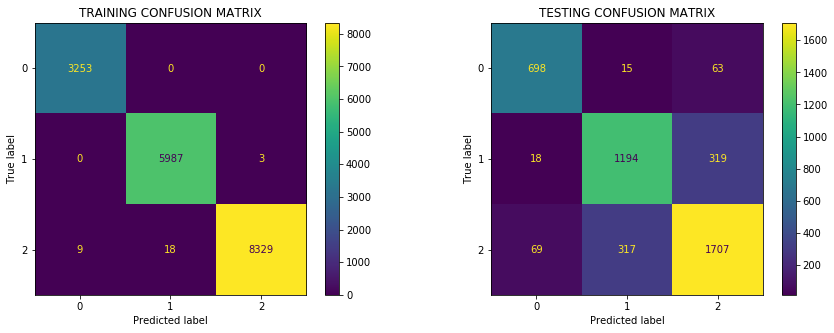

In [262]:
run_model(dtree, vect_X_train, y_train, vect_X_test, y_test, 3)

Good scores, but problem with overfitting. 11 point difference in recall 'earn' parameter

### Decision Tree - Merged df

In [263]:
X = df_merged.drop(['topic'], axis=1)
y = df_merged['topic']

X_train, X_test, y_train, y_test = train_test_split(X['text'], y, test_size=0.20, random_state=200)

In [264]:
vectorizer = TfidfVectorizer(ngram_range=(1,1), max_features=10000)
vect_X_train = vectorizer.fit_transform(X_train.values.astype(str))
vect_X_test = vectorizer.transform(X_test)

dtree = DecisionTreeClassifier(max_depth=None)
dtree.fit(vect_X_train, y_train)

DecisionTreeClassifier()

TRAINING - Classification Report
Accuracy: 99.9%
Precision: 99.8%
Recall: 100.0%
F1: 99.9%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3253
           2       1.00      1.00      1.00     14346

    accuracy                           1.00     17599
   macro avg       1.00      1.00      1.00     17599
weighted avg       1.00      1.00      1.00     17599

TESTING - Classification Report
Accuracy: 96.2%
Precision: 93.4%
Recall: 93.4%
F1: 93.4%
              precision    recall  f1-score   support

           1       0.89      0.89      0.89       776
           2       0.98      0.98      0.98      3624

    accuracy                           0.96      4400
   macro avg       0.93      0.93      0.93      4400
weighted avg       0.96      0.96      0.96      4400



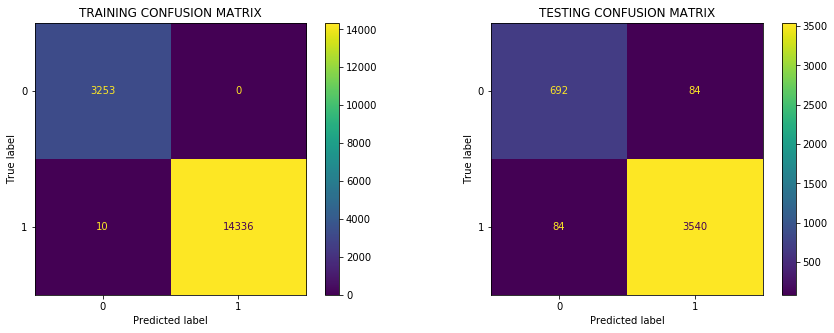

In [265]:
run_model(dtree, vect_X_train, y_train, vect_X_test, y_test, 2)

Similar results, but the overfitting problem is a tad better with the merged df.

### Decision Tree - No Blank

Curious to see how the default parameters will work on the df without any blanks

In [266]:
X = df_no_blank.drop(['topic'], axis=1)
y = df_no_blank['topic']

X_train, X_test, y_train, y_test = train_test_split(X['text'], y, test_size=0.20, random_state=200)

vectorizer = TfidfVectorizer(ngram_range=(1,1))
vect_X_train = vectorizer.fit_transform(X_train.values.astype(str))
vect_X_test = vectorizer.transform(X_test)

dtree = DecisionTreeClassifier()
dtree.fit(vect_X_train, y_train)

DecisionTreeClassifier()

TRAINING - Classification Report
Accuracy: 100.0%
Precision: 100.0%
Recall: 100.0%
F1: 100.0%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3210
           2       1.00      1.00      1.00      6030

    accuracy                           1.00      9240
   macro avg       1.00      1.00      1.00      9240
weighted avg       1.00      1.00      1.00      9240

TESTING - Classification Report
Accuracy: 97.2%
Precision: 97.0%
Recall: 96.8%
F1: 96.9%
              precision    recall  f1-score   support

           1       0.96      0.96      0.96       819
           2       0.98      0.98      0.98      1491

    accuracy                           0.97      2310
   macro avg       0.97      0.97      0.97      2310
weighted avg       0.97      0.97      0.97      2310



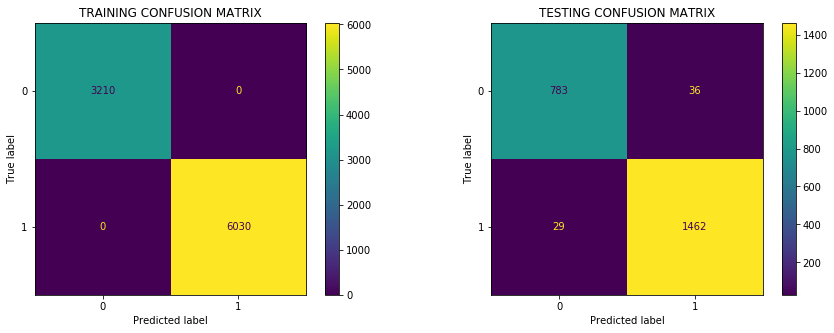

In [267]:
run_model(dtree, vect_X_train, y_train, vect_X_test, y_test, 2)

Very good scores! Minimal overfitting!

Makes me think that the 'blank' category must be corrupted with articles that would have been classified as 'earn'. 

One problem is the dataset is much smaller. 

In [268]:
print(f"Percent smaller without 'blank' topics: {round((len(df_no_blank)/len(df))*100, 2)}%")

Percent smaller without 'blank' topics: 52.5%


In [269]:
print(f"Topic 1: {round((sum(df_no_blank.topic == 1)/len(df_no_blank.topic)) *100, 2)}%")
print(f"Topic 2: {round((sum(df_no_blank.topic == 2)/len(df_no_blank.topic)) *100, 2)}%")

Topic 1: 34.88%
Topic 2: 65.12%


## Count Vectorizer

### Decision Tree - Main df

#### Train-test split

In [270]:
X = df.drop(['topic'], axis=1)
y = df['topic']

X_train, X_test, y_train, y_test = train_test_split(X['text'], y, test_size=0.20, random_state=200)

#### Pipeline 1

In [271]:
dt1_pipeline = Pipeline([('countv', CountVectorizer()), 
                         ('dt', DecisionTreeClassifier(random_state=123))])

dt1_param_grid = {
    'countv__ngram_range': [(1,1), (1,2)],
    'countv__max_features': [5000, 10000, 25000], 
    'dt__max_depth': [6]
}

dt1_grid_search = GridSearchCV(estimator=dt1_pipeline,
                               param_grid=dt1_param_grid,
                               scoring='recall_macro',
                               cv=3)

In [272]:
dt1_grid_search.fit(X_train.values.astype(str), y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('countv', CountVectorizer()),
                                       ('dt',
                                        DecisionTreeClassifier(random_state=123))]),
             param_grid={'countv__max_features': [5000, 10000, 25000],
                         'countv__ngram_range': [(1, 1), (1, 2)],
                         'dt__max_depth': [6]},
             scoring='recall_macro')

In [273]:
dt1_grid_search.best_params_

{'countv__max_features': 25000,
 'countv__ngram_range': (1, 2),
 'dt__max_depth': 6}

#### Pipeline 2

In [274]:
dt2_pipeline = Pipeline([('countv', CountVectorizer()), 
                         ('dt', DecisionTreeClassifier(random_state=123))])

dt2_param_grid = {
    'countv__ngram_range': [(1,2)],
    'countv__max_features': [25000, 35000], 
    'dt__max_depth': [6, None]
}

dt2_grid_search = GridSearchCV(estimator=dt2_pipeline,
                               param_grid=dt2_param_grid,
                               scoring='recall_macro',
                               cv=3)

dt2_grid_search.fit(X_train.values.astype(str), y_train)

dt2_grid_search.best_params_

{'countv__max_features': 35000,
 'countv__ngram_range': (1, 2),
 'dt__max_depth': None}

#### Run Model

In [275]:
vectorizer = CountVectorizer(ngram_range=(1,2), max_features=25000)
vect_X_train = vectorizer.fit_transform(X_train.values.astype(str))
vect_X_test = vectorizer.transform(X_test)

dtree = DecisionTreeClassifier(max_depth=None)
dtree.fit(vect_X_train, y_train)

DecisionTreeClassifier()

TRAINING - Classification Report
Accuracy: 99.8%
Precision: 99.8%
Recall: 99.9%
F1: 99.8%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3253
           2       1.00      1.00      1.00      5990
           3       1.00      1.00      1.00      8356

    accuracy                           1.00     17599
   macro avg       1.00      1.00      1.00     17599
weighted avg       1.00      1.00      1.00     17599

TESTING - Classification Report
Accuracy: 82.6%
Precision: 83.7%
Recall: 83.6%
F1: 83.6%
              precision    recall  f1-score   support

           1       0.89      0.88      0.89       776
           2       0.79      0.80      0.79      1531
           3       0.83      0.82      0.83      2093

    accuracy                           0.83      4400
   macro avg       0.84      0.84      0.84      4400
weighted avg       0.83      0.83      0.83      4400



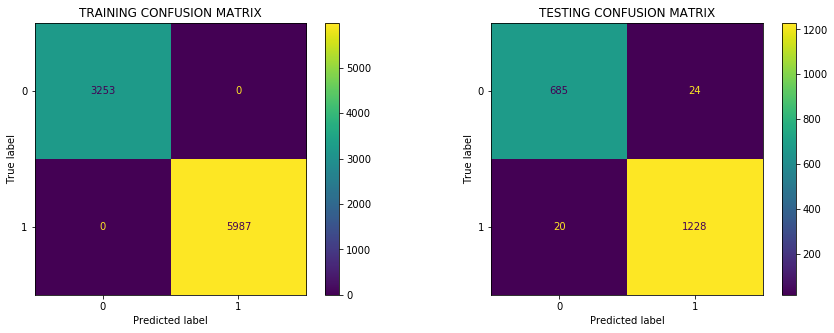

In [276]:
run_model(dtree, vect_X_train, y_train, vect_X_test, y_test, 2)

About the same as the last one with worse issue with overfitting.

### Decision Tree - No Blank

In [277]:
X = df_no_blank.drop(['topic'], axis=1)
y = df_no_blank['topic']

X_train, X_test, y_train, y_test = train_test_split(X['text'], y, test_size=0.20, random_state=200)

vectorizer = CountVectorizer(ngram_range=(1,2), max_features=25000)
vect_X_train = vectorizer.fit_transform(X_train.values.astype(str))
vect_X_test = vectorizer.transform(X_test)

dtree = DecisionTreeClassifier(max_depth=None)
dtree.fit(vect_X_train, y_train)

DecisionTreeClassifier()

TRAINING - Classification Report
Accuracy: 100.0%
Precision: 100.0%
Recall: 100.0%
F1: 100.0%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3210
           2       1.00      1.00      1.00      6030

    accuracy                           1.00      9240
   macro avg       1.00      1.00      1.00      9240
weighted avg       1.00      1.00      1.00      9240

TESTING - Classification Report
Accuracy: 96.7%
Precision: 96.5%
Recall: 96.3%
F1: 96.4%
              precision    recall  f1-score   support

           1       0.96      0.95      0.95       819
           2       0.97      0.98      0.97      1491

    accuracy                           0.97      2310
   macro avg       0.97      0.96      0.96      2310
weighted avg       0.97      0.97      0.97      2310



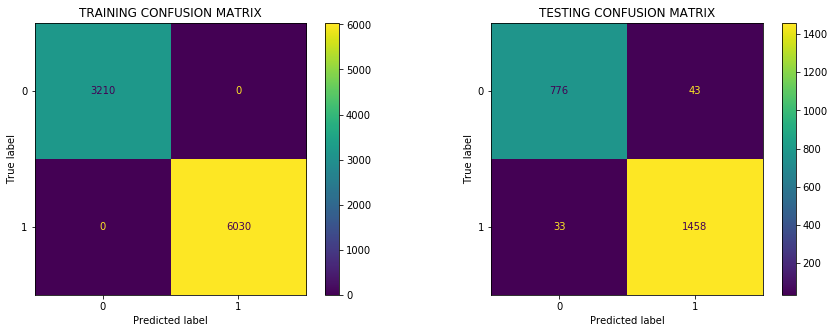

In [278]:
run_model(dtree, vect_X_train, y_train, vect_X_test, y_test, 2)

Again, good scores when you don't have the 'blank' category.

# Conclusion

The best performing model with least overfitting for predicting the 'earn' category uses:     

`vectorizer = TfidfVectorizer(ngram_range=(1,1))`
with the default DecisionTree parameters and only two topics: 'earn' and 'other' and removing the articles where the topics are 'blank'. 



TRAINING - Classification Report
Accuracy: 100.0%
Precision: 100.0%
Recall: 100.0%
F1: 100.0%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3210
           2       1.00      1.00      1.00      6030

    accuracy                           1.00      9240
   macro avg       1.00      1.00      1.00      9240
weighted avg       1.00      1.00      1.00      9240

TESTING - Classification Report
Accuracy: 96.8%
Precision: 96.6%
Recall: 96.5%
F1: 96.5%
              precision    recall  f1-score   support

           1       0.96      0.95      0.96       819
           2       0.97      0.98      0.98      1491

    accuracy                           0.97      2310
   macro avg       0.97      0.96      0.97      2310
weighted avg       0.97      0.97      0.97      2310



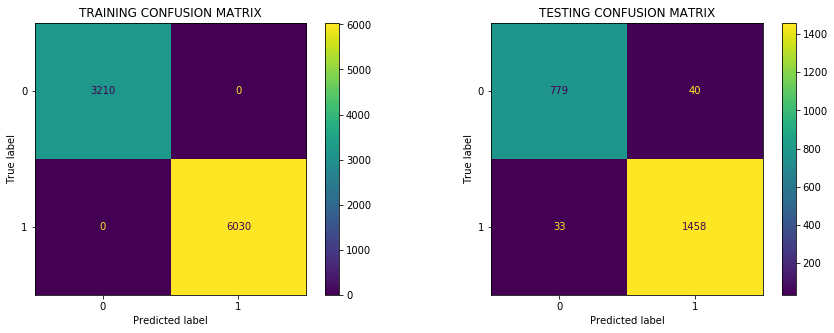

In [279]:
X = df_no_blank.drop(['topic'], axis=1)
y = df_no_blank['topic']

X_train, X_test, y_train, y_test = train_test_split(X['text'], y, test_size=0.20, random_state=200)

vectorizer = TfidfVectorizer(ngram_range=(1,1))
vect_X_train = vectorizer.fit_transform(X_train.values.astype(str))
vect_X_test = vectorizer.transform(X_test)

dtree = DecisionTreeClassifier()
dtree.fit(vect_X_train, y_train)

run_model(dtree, vect_X_train, y_train, vect_X_test, y_test, 2)